## Test VEP results

In [1]:
import mmsplice
mmsplice.__version__

Using TensorFlow backend.
/opt/modules/i12g/anaconda/3-5.0.1/envs/mmsplice_dev/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator HuberRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/modules/i12g/anaconda/3-5.0.1/envs/mmsplice_dev/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator StandardScaler from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/modules/i12g/anaconda/3-5.0.1/envs/mmsplice_dev/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/modules/i12g/anaconda/3-5.0.1/envs/mmsplice_dev/lib/python3.6/site-packages/s

'0.2.7'

In [2]:
from kipoi_veff.parsers import KipoiVCFParser

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mmsplice.utils import read_vep

In [4]:
input_file = 'variant_effect_output.txt'

In [5]:
df = pd.DataFrame(list(KipoiVCFParser(input_file)))

In [6]:
df['ID'] = df.variant_chr + ':' + df.variant_pos.map(str) + ':' + df.variant_ref + ":['" + df.variant_alt + "']"

In [7]:
df = df[['ID', 'other_CLNSIG']]

In [8]:
pred = read_vep(input_file, max_per_var=True)

In [9]:
pred = pred.merge(df, on='ID')

In [10]:
pred.describe()

,mmsplice_dlogitPsi,mmsplice_alt_acceptor,mmsplice_alt_acceptorIntron,mmsplice_alt_donor,mmsplice_alt_donorIntron,mmsplice_alt_exon,mmsplice_delta_logit_psi,mmsplice_pathogenicity,mmsplice_ref_acceptor,mmsplice_ref_acceptorIntron,mmsplice_ref_donor,mmsplice_ref_donorIntron,mmsplice_ref_exon
count,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4.602000e+03,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000
mean,-3.047664,1.840225,-3.103388,0.808582,0.363904,-3.467712,-3.047664,9.740113e-01,3.156113,-3.103464,3.606895,0.363120,-3.467732
std,1.371865,2.435582,0.787310,3.037525,0.362409,0.782329,1.371865,1.280550e-01,2.130352,0.787336,1.964527,0.363061,0.782278
min,-7.195271,-9.361466,-5.975063,-5.914912,-1.164159,-7.653551,-7.195271,8.683932e-08,-9.361466,-5.975063,-5.914912,-1.164159,-7.653551
25%,-3.934646,0.155364,-3.707661,-1.620290,0.110853,-3.962902,-3.934646,9.998760e-01,2.104494,-3.709394,2.802889,0.108303,-3.964111
50%,-2.991229,1.927961,-2.920786,0.282730,0.397828,-3.429325,-2.991229,9.999899e-01,3.345858,-2.919610,3.787192,0.396787,-3.429325
75%,-2.162654,3.624514,-2.474856,3.500847,0.645265,-2.925293,-2.162654,9.999987e-01,4.499015,-2.474856,4.778851,0.645557,-2.925293
max,4.352935,8.484281,-1.441578,8.360686,1.439749,-1.056427,4.352935,1.000000e+00,8.585599,-1.441578,8.360686,1.439749,-1.056427


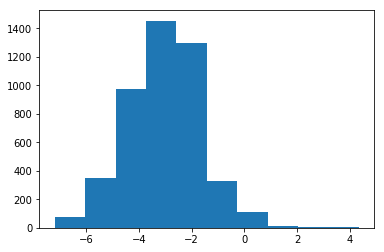

In [11]:
plt.hist(pred.mmsplice_dlogitPsi)
plt.show()